In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (t : trial_type)
#### Load data and check data head
##### Use anxious.csv

In [2]:
# Load data from csv file into a NumPy structured array
dataAnx = hddm.load_csv('./rt_dataframes/anxious.csv')
dataAnx.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,ff1d7a9a28686c2b,2217.0,1.0,101,16.0,-5.0,0.0,1.0
1,ff1d7a9a28686c2b,1424.0,0.0,101,18.0,-6.0,0.0,1.0
2,ff1d7a9a28686c2b,1805.0,1.0,101,10.0,-5.0,0.0,1.0
3,ff1d7a9a28686c2b,1477.0,1.0,102,14.0,0.0,3.0,1.0
4,ff1d7a9a28686c2b,1257.0,1.0,102,12.0,0.0,4.0,1.0
5,ff1d7a9a28686c2b,1564.0,1.0,101,11.0,-5.0,0.0,1.0
6,ff1d7a9a28686c2b,1421.0,0.0,101,14.0,-4.0,0.0,1.0
7,ff1d7a9a28686c2b,1492.0,0.0,102,14.0,0.0,3.0,1.0
8,ff1d7a9a28686c2b,1196.0,0.0,102,20.0,0.0,7.0,0.0
9,ff1d7a9a28686c2b,1572.0,0.0,101,12.0,-5.0,0.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
dataAnx = dataAnx.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataAnx['rt'] = dataAnx['rt']/1000
dataAnx.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,ff1d7a9a28686c2b,2.217,1.0,101,16.0,-5.0,0.0,1.0
1,ff1d7a9a28686c2b,1.424,0.0,101,18.0,-6.0,0.0,1.0
2,ff1d7a9a28686c2b,1.805,1.0,101,10.0,-5.0,0.0,1.0
3,ff1d7a9a28686c2b,1.477,1.0,102,14.0,0.0,3.0,1.0
4,ff1d7a9a28686c2b,1.257,1.0,102,12.0,0.0,4.0,1.0
5,ff1d7a9a28686c2b,1.564,1.0,101,11.0,-5.0,0.0,1.0
6,ff1d7a9a28686c2b,1.421,0.0,101,14.0,-4.0,0.0,1.0
7,ff1d7a9a28686c2b,1.492,0.0,102,14.0,0.0,3.0,1.0
8,ff1d7a9a28686c2b,1.196,0.0,102,20.0,0.0,7.0,0.0
9,ff1d7a9a28686c2b,1.572,0.0,101,12.0,-5.0,0.0,1.0


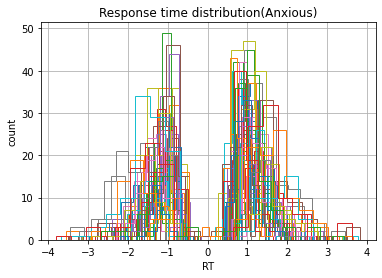

In [4]:
#flip the error RTs to be negative
dataAnx = hddm.utils.flip_errors(dataAnx)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Anxious)')
for i, subj_data in dataAnx.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM2C(allparameter)/rt_distribution(anx).png')

## Fitting the hierarchical model for one condition with no subject effects for Anxious participants

In [6]:
m = hddm.HDDM(dataAnx,depends_on={'t': 'trial_type'}, include=('v', 'a', 't', 'z', 'sv', 'st', 'sz'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM2C(allparameter)/traces(2CAnx_t)', db='pickle')
m.save('./fitting_results/HDDM/HDDM2C(allparameter)/model(2CAnx_t)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 6642.1 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t(101)
Plotting t(102)
Plotting t_std
Plotting sv
Plotting sz
Plotting st
Plotting z
Plotting z_std


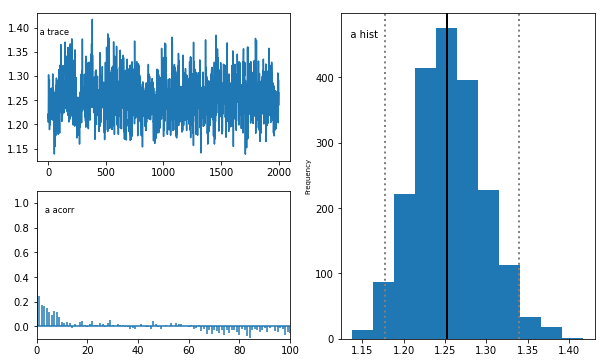

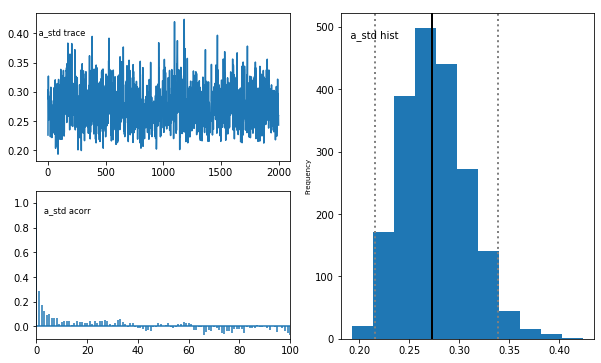

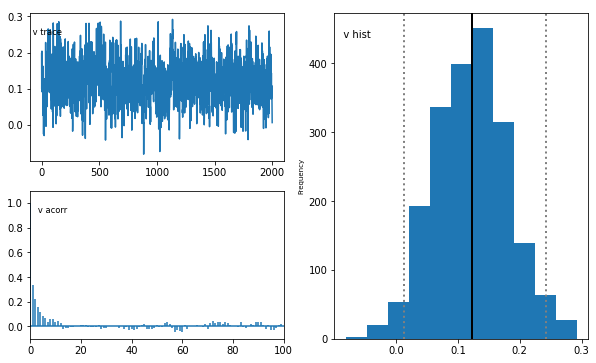

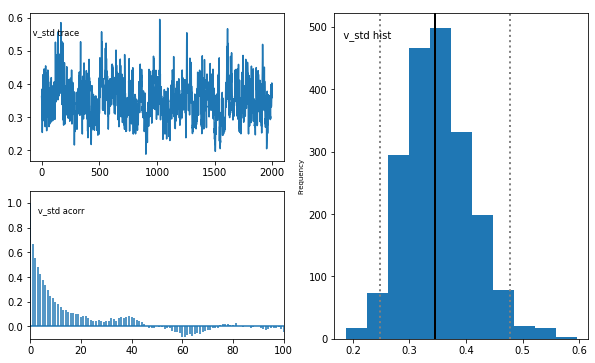

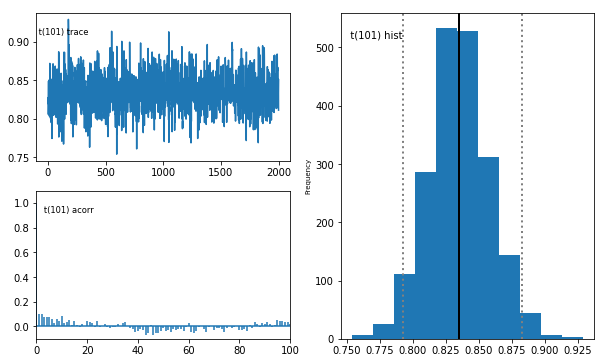

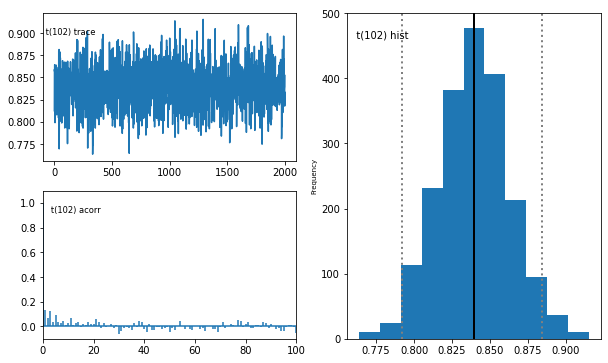

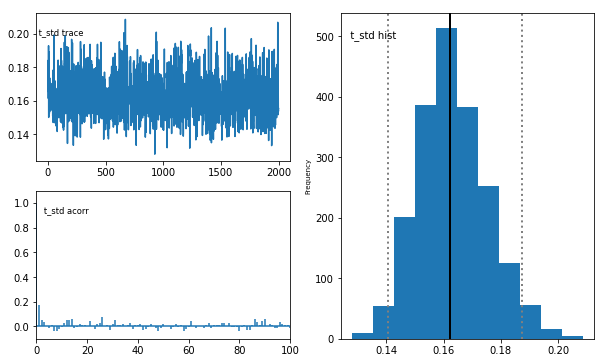

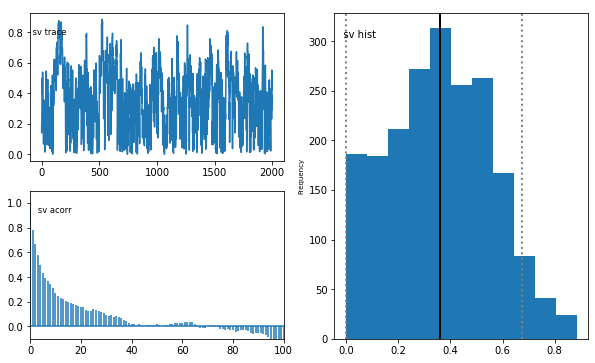

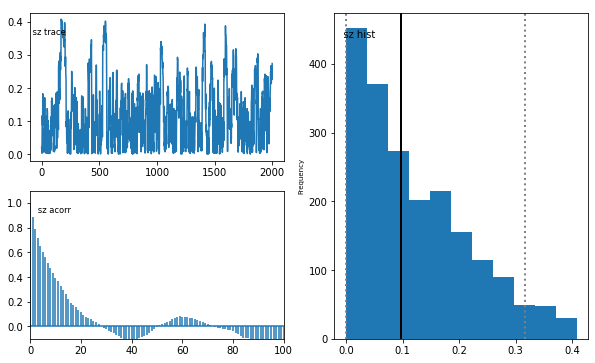

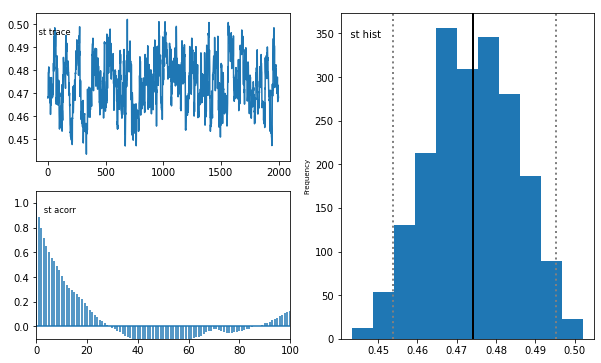

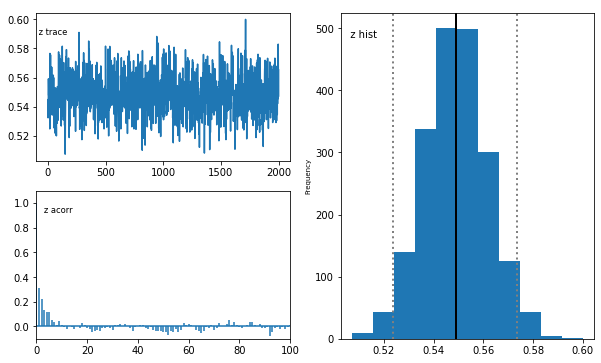

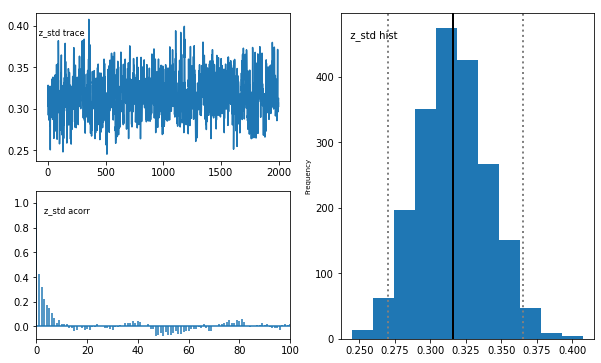

In [7]:
# plot posteriors
m.plot_posteriors(['v', 'a', 't', 'z', 'sv', 'st', 'sz', 'v_std', 'a_std','t_std','z_std','st_std','sz_std'])

In [8]:
stats2Ca = m.gen_stats()
stats2Ca.to_csv('./fitting_results/HDDM/HDDM2C(allparameter)/HDDM2CAnx_t.csv', sep=',')
stats2Ca[stats2Ca.index.isin(['v', 'a', 't', 'z', 'sv', 'st', 'sz', 'v_std', 'a_std','t_std','z_std','st_std','sz_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.25523,0.0420935,1.1792,1.22611,1.25223,1.28243,1.34234,0.00167379
a_std,0.276168,0.0329417,0.219403,0.252638,0.273109,0.297023,0.34468,0.00120335
v,0.120827,0.0590047,0.00729662,0.0803777,0.122008,0.159567,0.239451,0.00222254
v_std,0.350789,0.0593877,0.249295,0.308922,0.34588,0.387637,0.479114,0.00366988
t_std,0.163316,0.01213,0.141708,0.155135,0.162138,0.171119,0.189481,0.000343611
sv,0.359615,0.194274,0.0237089,0.211035,0.359902,0.501702,0.759112,0.013138
sz,0.121476,0.0967191,0.00309147,0.0410821,0.0967171,0.18351,0.354078,0.00737703
st,0.474071,0.0109608,0.45337,0.465999,0.474119,0.482187,0.494974,0.000828747
z,0.548991,0.0126576,0.523996,0.540426,0.548993,0.557199,0.574725,0.000465607
z_std,0.316581,0.0244261,0.27014,0.300055,0.316154,0.332671,0.365399,0.00110299


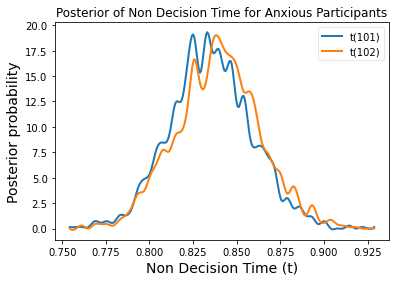

In [9]:
t_101, t_102 = m.nodes_db.node[['t(101)', 't(102)']]
hddm.analyze.plot_posterior_nodes([t_101, t_102])
plt.xlabel('Non Decision Time (t)', fontsize=14)
plt.ylabel('Posterior probability', fontsize=14)
plt.title('Posterior of Non Decision Time for Anxious Participants', fontsize=12)
plt.savefig('./fitting_results/HDDM/HDDM2C(allparameter)/posterior_tAnx(101,102).png')

In [10]:
m.dic

13870.025219872447

## Check for model convergence

In [11]:
# Set up models list to append results
models2CtAnx = list()

In [12]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,depends_on={'t': 'trial_type'}, include=('v', 'a', 't', 'z', 'sv', 'st', 'sz'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C(allparameter)/chain2Ct_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C(allparameter)/chain2CtANX_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [17]:
num_chains = 5
data_chains = [(dataAnx,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models2CtAnx = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 0Fitting chain 1Fitting chain 2

Fitting chain 3


Fitting chain 4



/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------97%----------------- ] 2924 of 3000 complete in 719.7 sec                0%                  ] 4 of 3000 complete in 0.5 sec[                  0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 7 of 3000 complete in 1.1 sec [                  0%                  ] 7 of 3000 complete in 1.1 sec[                  0%                  ] 7 of 3000 complete in 1.1 sec[                  0%                  ] 7 of 3000 complete in 1.1 sec  [                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec [                  0%                  ] 13 of 3000 complete in 2.2 sec[                  0%                  ] 13 of 3000 complete in 2.2 sec[        

In [18]:
models2CtAnx

In [22]:
results = hddm.analyze.gelman_rubin(models2CtAnx)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.000189957611269
a_std: 1.0008793908724707
a_subj.00aa64fdcb675341: 1.0003373148912575
a_subj.06c46b112368babf: 1.0005735362763963
a_subj.0beac20378edac7b: 1.00045409039956
a_subj.10d15198ac61a404: 0.999884867309111
a_subj.12a096342c4d052f: 1.0002492414187025
a_subj.13e347e32a454872: 0.9999014327317839
a_subj.1ffdcfc59b83c43a: 1.0011936716008278
a_subj.221e9f16c114b2c0: 0.9999735855622435
a_subj.2737c4b829b3018f: 1.0001471953819394
a_subj.279cd1540fc8f71f: 1.000691273950249
a_subj.2a531595d6ab08c8: 1.0000698684628047
a_subj.2adc46a1bfc70679: 1.0000022847310357
a_subj.322d6276c00056e7: 1.000371959120478
a_subj.46099f8b742520b0: 1.0014368992979825
a_subj.49c4e664cf02d362: 1.0000677292710594
a_subj.4a6bf10e80304920: 1.00017654877611
a_subj.4dee88b397c3bbf4: 1.0001341204432936
a_subj.52abc657a668b04e: 0.9999831452145754
a_subj.5696a26f6b865ccb: 1.0003665454755095
a_subj.61dce9b56e969395: 1.0004370455627378
a_subj.6246f3d78ae6b481: 1.0000640035120252
a_subj.6ac61d4f76c3add5: 1.001045285

In [20]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{}

Values smaller than the threshold:
{}


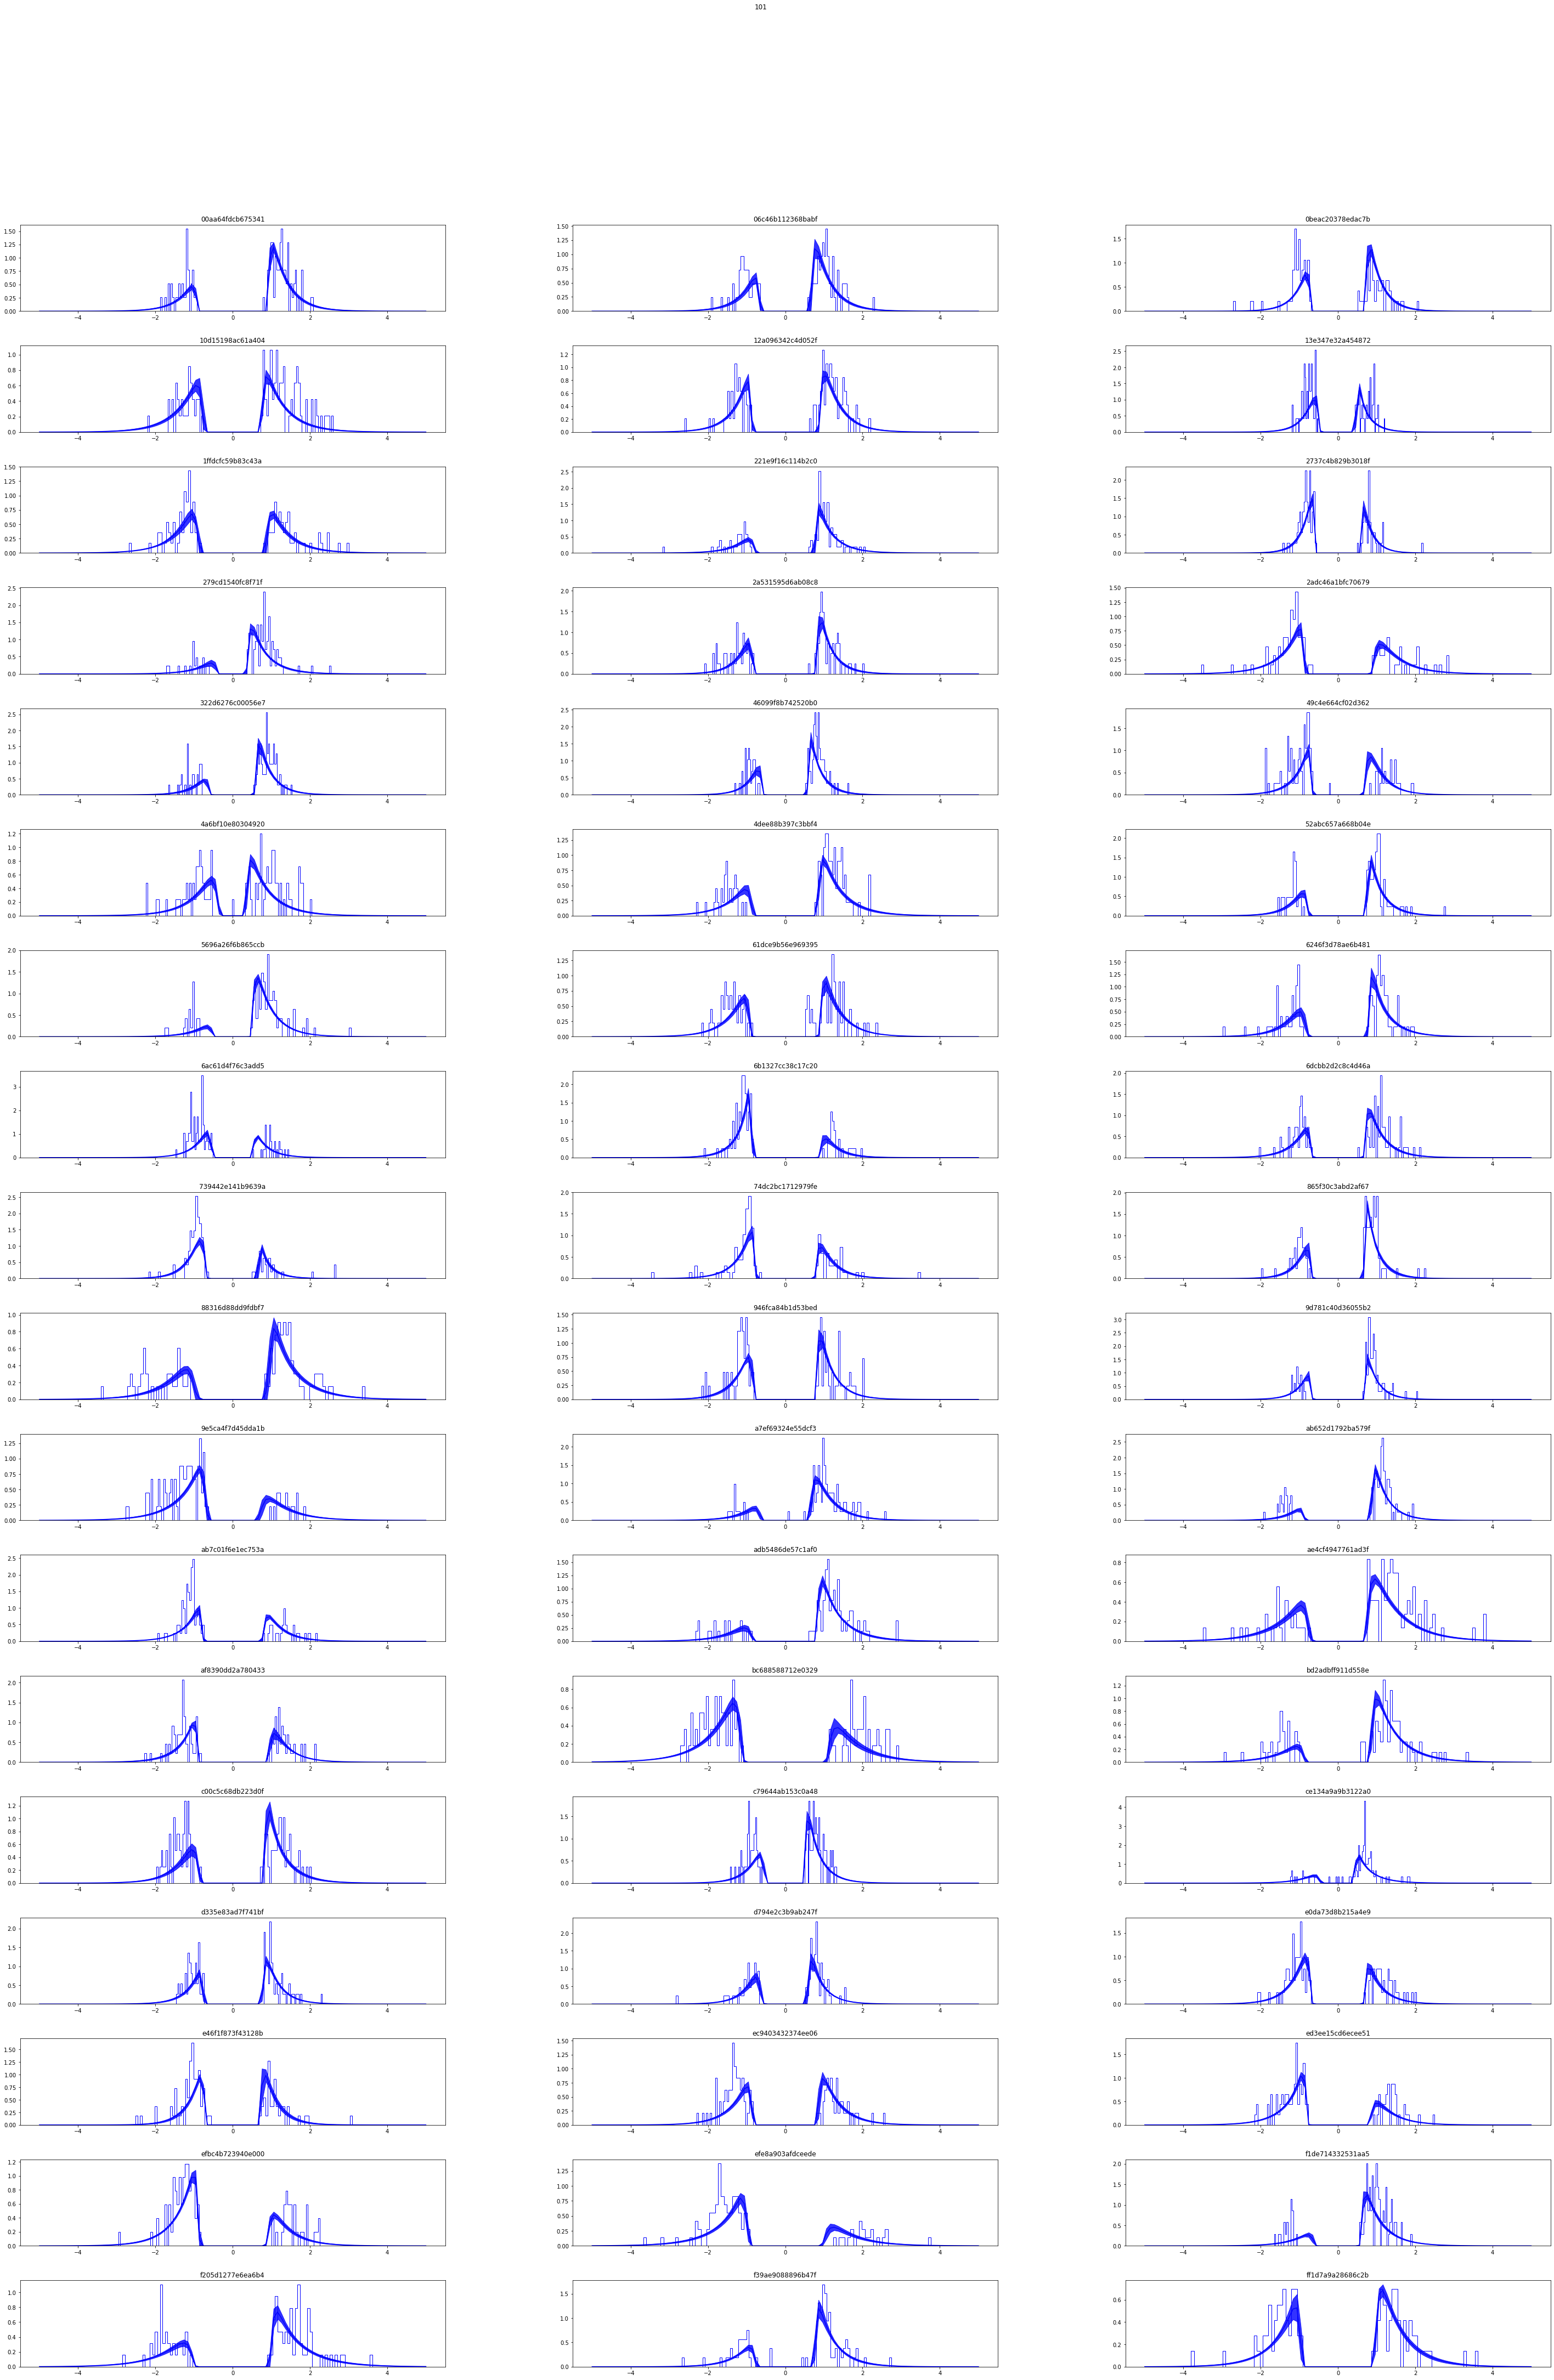

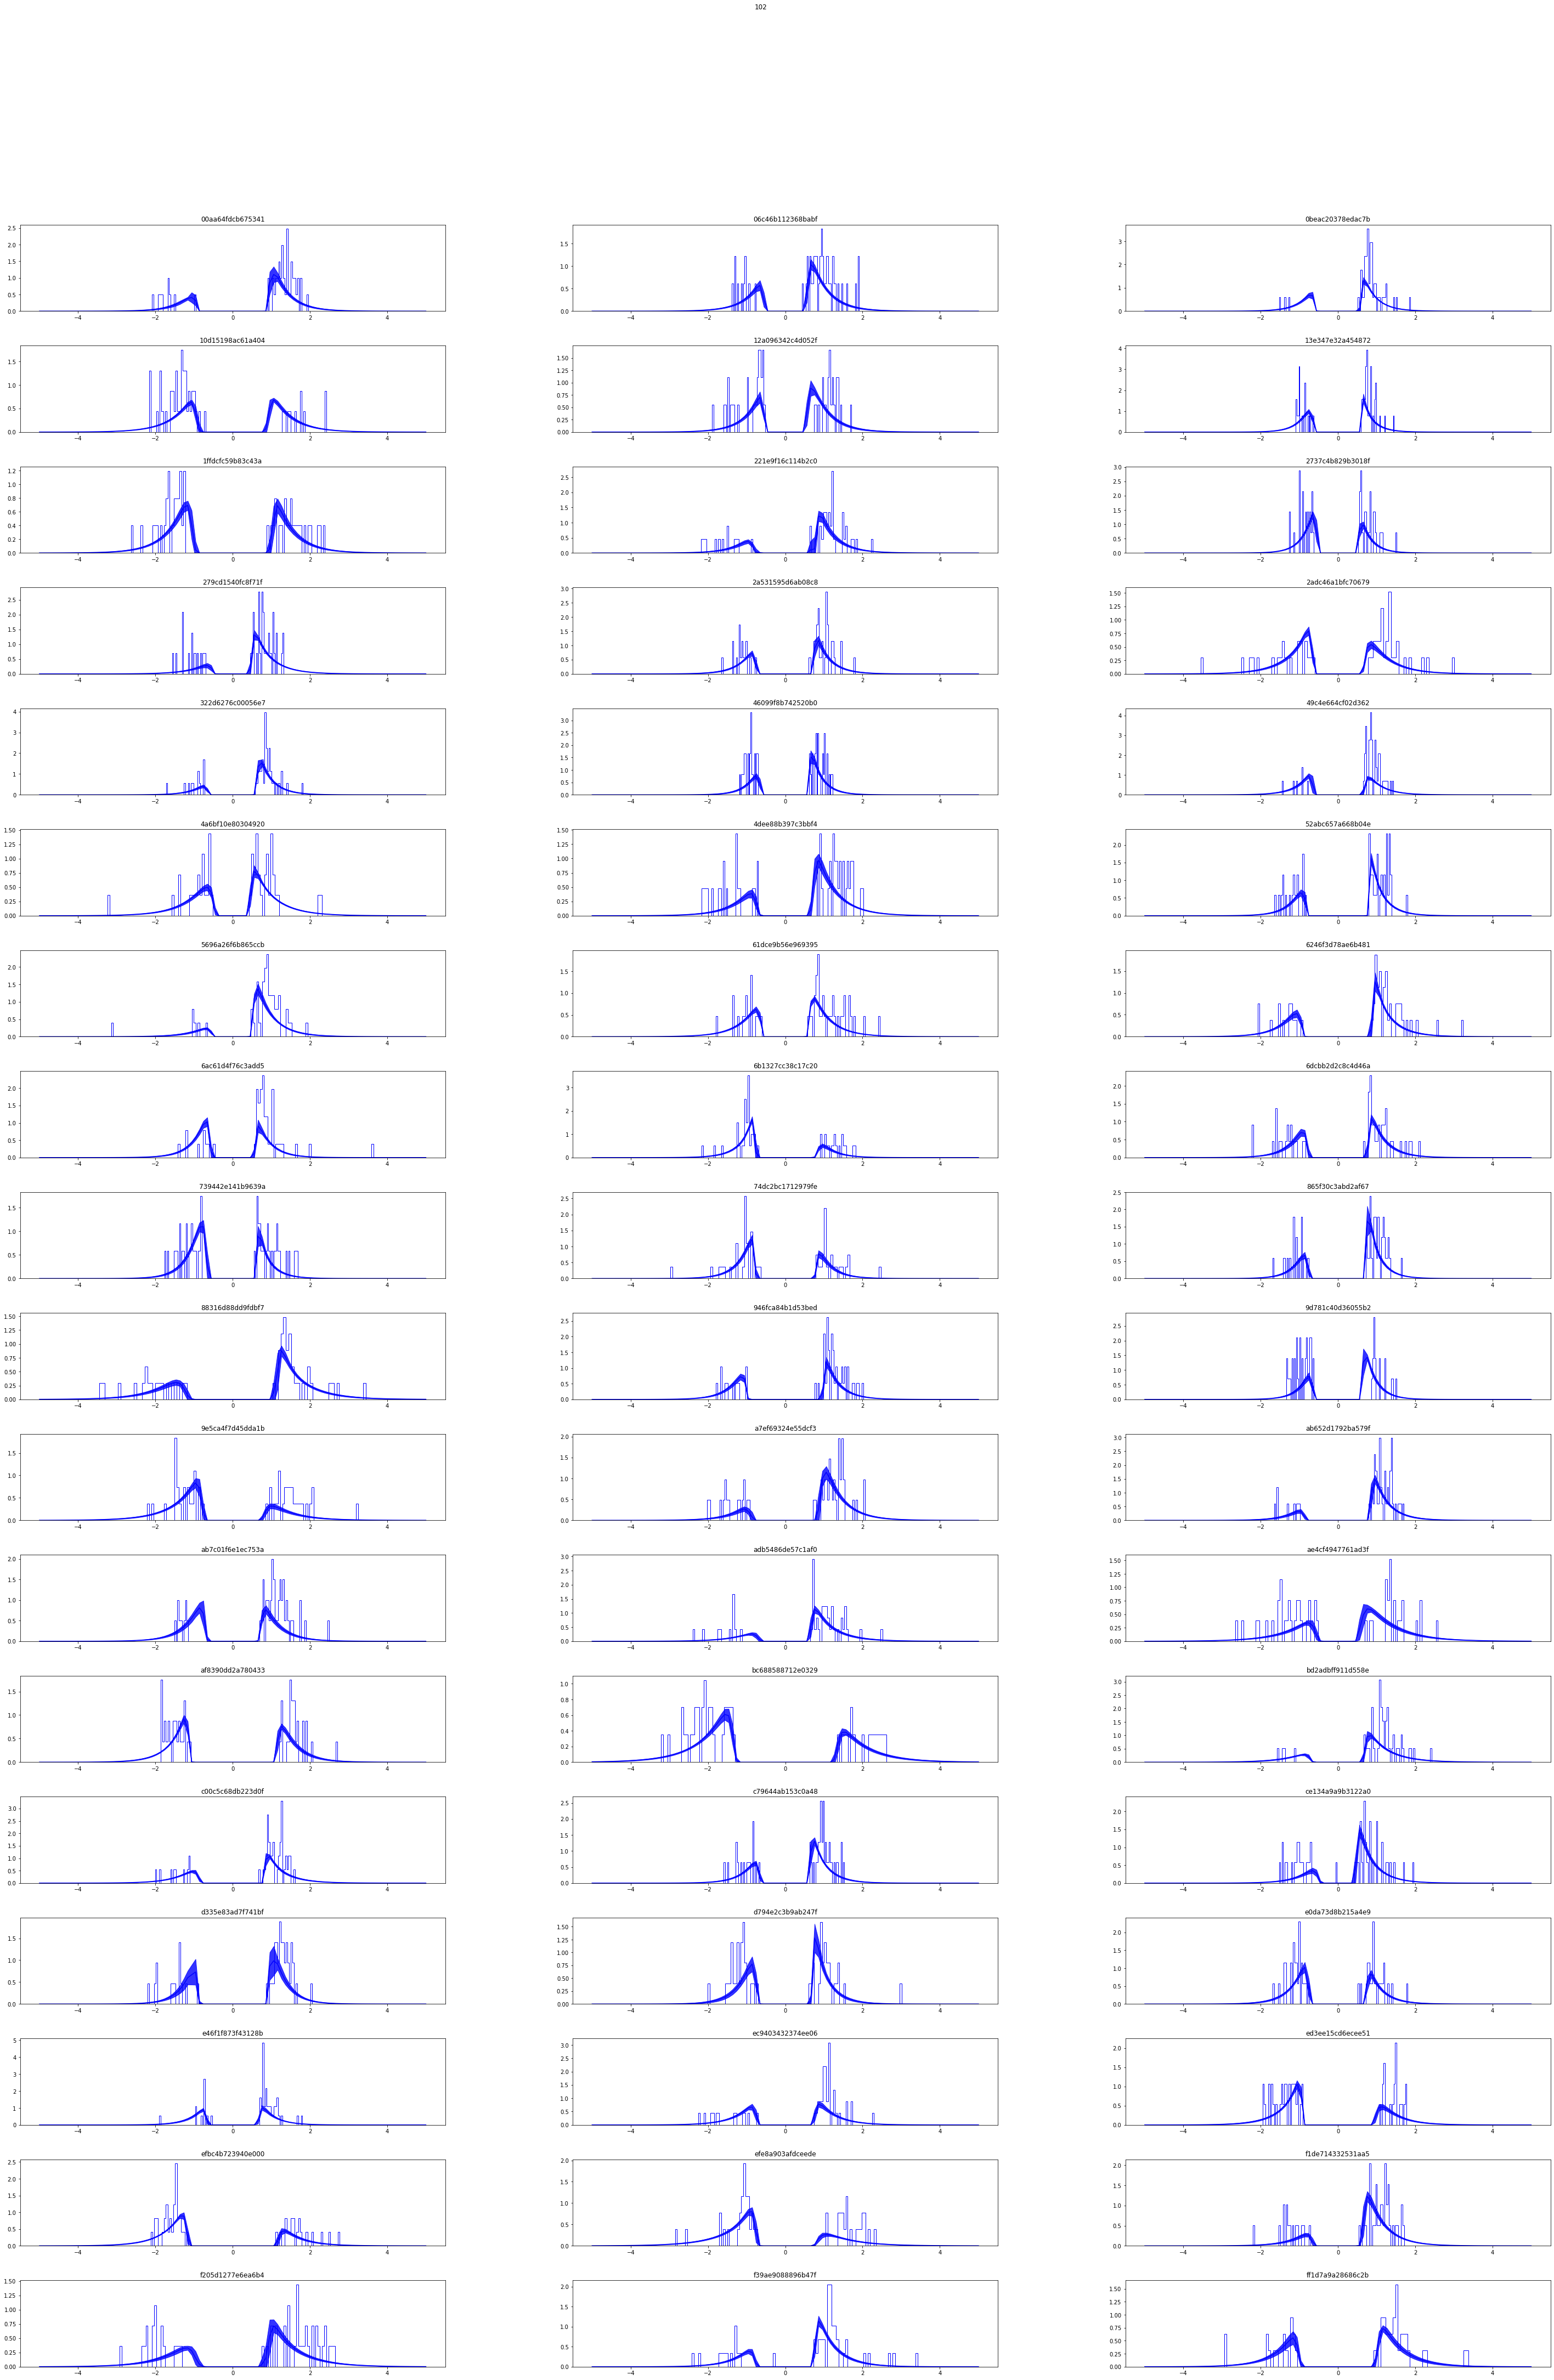

In [21]:
m.plot_posterior_predictive(figsize=(50, 70))

## group Nodes to check if improve convergence

In [5]:
m = hddm.HDDM(dataAnx,depends_on={'t': 'trial_type'}, include=('v', 'a', 't', 'z', 'sv', 'st', 'sz'), group_only_nodes=['sv', 'st', 'sz'])
m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM2C(allparameter)/traces(2CAnx_tg)', db='pickle')
m.save('./fitting_results/HDDM/HDDM2C(allparameter)/model(2CAnx_t_grouped)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 6734.7 sec

In [6]:
m.dic

13869.393976498373